In [14]:
import scipy as sp
import numpy as np
#import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def FHNneuron(Iext,time,point):
    #parameters
    #would be nice to explain what each param means
    a=0.7
    b=0.8
    c=3
    
    #these two params from scholarpedia, would like better justification
    R=1
    tau=1/(0.08*3) #1/tau
    
    #might want t to be variable?
    #t = sp.arange(0.0, 450.0, 0.01)
    t=time
    
    def dALLdt(X, t):
        """
        Integrate

        |  :param X:
        |  :param t:
        |  :return: calculate membrane potential & activation variables
        """
        
        v, w = X
        
        dvdt = v - v**3 - w + R*Iext
        dwdt = (1/(tau*c))*(v + a - b*w)
        
        return dvdt, dwdt
    
    X = odeint(dALLdt, point, t)#need initial guesses for v and w
    #v = X[:,0]
    #w = X[:,1]
    
    return X

    

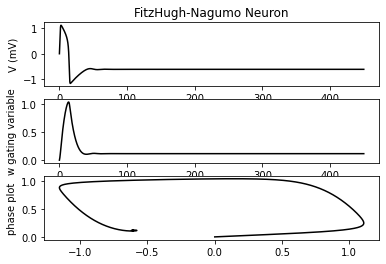

In [15]:
I=0.5;
t=np.arange(0.0, 450.0, 0.01)
neuron1=FHNneuron(I,t,[0,0]);
v=neuron1[:,0];
w=neuron1[:,1];

plt.figure()

plt.subplot(3,1,1)
plt.title('FitzHugh-Nagumo Neuron')
plt.plot(t, v, 'k')
plt.ylabel('V (mV)')

plt.subplot(3,1,2)
plt.plot(t, w, 'k')
plt.ylabel('w gating variable')

plt.subplot(3,1,3)
plt.plot(v, w, 'k')
plt.ylabel('phase plot')

plt.show()    
    

(-0.5, 2.0)

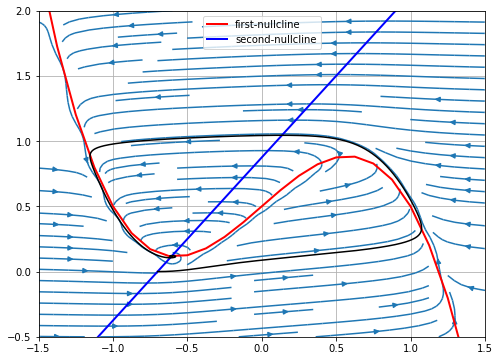

In [16]:
#for this, pick Iext
Iext=0.5;
t=np.arange(0.0, 450.0, 0.01)

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def Syst(X,Iext): #without time
    a=0.7
    b=0.8
    c=3
    
    #these two params from scholarpedia, would like better justification
    R=1
    tauinv=0.08 #1/tau
    """
    Integrate

    |  :param X:
    |  :param t:
    |  :return: calculate membrane potential & activation variables
    """
        
    v, w = X
        
    dvdt = v - v**3 - w + R*Iext
    dwdt = (tauinv)*(v + a - b*w)
        
    return dvdt, dwdt







def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    a=0.7
    b=0.8
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

neuron=FHNneuron(Iext,t,[-0.7,0]);
va=neuron[:,0];
wa=neuron[:,1];
ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

In [25]:
def find_roots(I): #This gives the equilibrium points, given I
    a=0.7
    b=0.8
    coeff=[1, 0, 1/b - 1, a/b - I]
    #Only keep real roots:
    roots = [np.real(r) for r in np.roots(coeff) if np.isreal(r)]
    # We store the position of the equilibrium. 
    return [[r, r - r**3 + I] for r in roots]

In [18]:
def jacobian(point, I): #find jacobian by hand, put equilibrium points into here
    a=0.7
    b=0.8
    c=3
    tau=1/(0.08*3) #1/tau
    v=point[0]
    w=point[1]
    return np.array([[- 3 * v**2 + 1 , -1],
                       [1/tau, -b/(c*tau)]])

In [19]:
def stability(jacobian): #Put jacobian into here and it says what kind of point it is
    eigv = np.linalg.eigvals(jacobian)
    
    if all(np.real(eigv)==0) and all(np.imag(eigv)!=0):
        nature = "Center" 
    elif np.real(eigv)[0]*np.real(eigv)[1]<0:
        nature = "Saddle"
    else: 
        stability = 'Unstable' if all(np.real(eigv)>0) else 'Stable'
        nature = stability + (' focus' if all(np.imag(eigv)!=0) else ' node')
    return nature

In [20]:
find_roots(0.5)[0]

[1.037170379302335, 0.4214629741279201]

In [21]:
jacobian(find_roots(0.5)[0],0.5)

array([[-2.22716719, -1.        ],
       [ 0.24      , -0.064     ]])

In [22]:
stability(jacobian(find_roots(0.5)[0],0.5))

'Stable node'

In [23]:
#IT WORKS!!!!!, so now, can we add these to a graph???

Stable focus
[-0.6067058313811147, 0.1166177107736065]


(-0.5, 2.0)

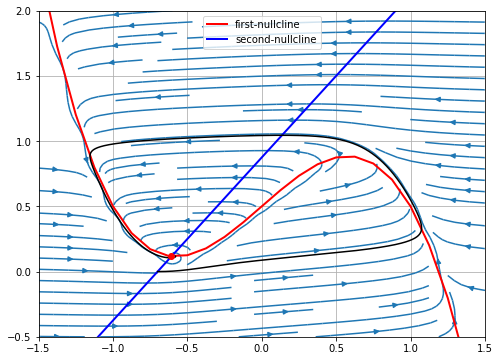

In [26]:
#for this, pick Iext
Iext=0.5;
t=np.arange(0.0, 450.0, 0.01);

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def Syst(X,Iext): #without time
    a=0.7
    b=0.8
    c=3
    
    #these two params from scholarpedia, would like better justification
    R=1
    tauinv=0.08 #1/tau
    """
    Integrate

    |  :param X:
    |  :param t:
    |  :return: calculate membrane potential & activation variables
    """
        
    v, w = X
        
    dvdt = v - v**3 - w + R*Iext
    dwdt = (tauinv)*(v + a - b*w)
        
    return dvdt, dwdt



def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    a=0.7
    b=0.8
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

neuron=FHNneuron(Iext,t,[-0.7,0]);
va=neuron[:,0];
wa=neuron[:,1];
ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M


    
ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()

roots=find_roots(Iext);
for root in roots:

    label=stability(jacobian(root,Iext))
    print(label)
    print(root)
    plt.plot(root[0],root[1],"ro")


plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

Stable node
[1.1048766506044245, 0.5060958132555307]


(-0.5, 2.0)

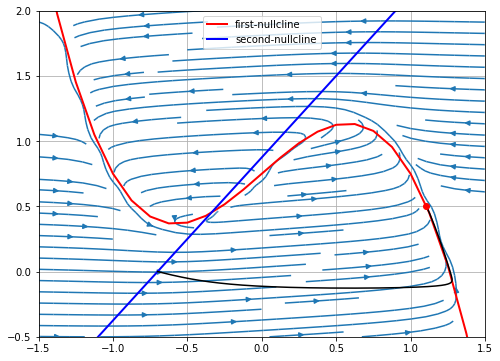

In [12]:
#for this, pick Iext
Iext=0.75;
t=np.arange(0.0, 450.0, 0.01);

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def Syst(X,Iext): #without time
    a=0.7
    b=0.8
    c=3
    
    #these two params from scholarpedia, would like better justification
    R=1
    tauinv=0.08 #1/tau
    """
    Integrate

    |  :param X:
    |  :param t:
    |  :return: calculate membrane potential & activation variables
    """
        
    v, w = X
        
    dvdt = v - v**3 - w + R*Iext
    dwdt = (tauinv)*(v + a - b*w)
        
    return dvdt, dwdt



def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    a=0.7
    b=0.8
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

neuron=FHNneuron(Iext,t,[-0.7,0]);
va=neuron[:,0];
wa=neuron[:,1];
ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M


    
ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()

roots=find_roots(Iext);
for root in roots:

    label=stability(jacobian(root,Iext))
    print(label)
    print(root)
    plt.plot(root[0],root[1],"ro")
    
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

ValueError: diff requires input that is at least one dimensional

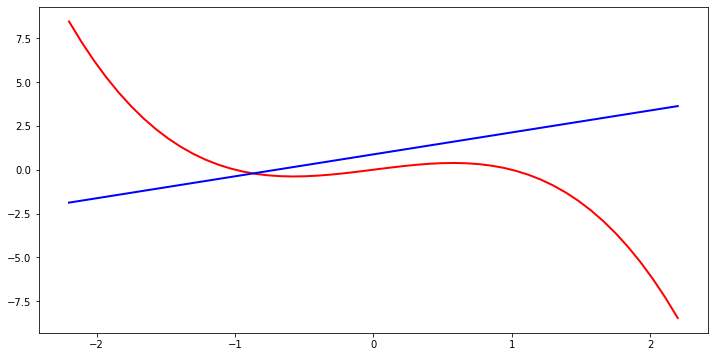

In [13]:
#for this, pick Iext
Iext=0;
t=np.arange(0.0, 100.0, 0.01);

fig2 = plt.figure(figsize=(12,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-2.2,2.2,50);
w=np.linspace(-1,1.2,50);



ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

#tstop=450;
#dt=0.01
#t=np.arange(0.0, tstop, dt)
#neuron=FHNneuron(Iext,tstop,dt,[-0.7,0]);
#va=neuron[0];
#wa=neuron[1];
#ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M


tstop=100;
dt=0.01
t=np.arange(0.0, tstop, dt)

points=[[-0.7,0],[0,0.25],[2,-0.9],[2,-0.5],[-1.5,0.75],[2,0.25]]
for point in points:
    neuron=FHNneuron(Iext,tstop,point);
    va=neuron[0];
    wa=neuron[1];
    ax4.plot(va,wa,'k-')

    
ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()

roots=find_roots(Iext);
for root in roots:

    label=stability(jacobian(root,Iext))
    print(label)
    print(root)
    plt.plot(root[0],root[1],"go")
    plt.annotate(label,root)

plt.xlim(-2.2,2.2)
plt.ylim(-1,1.2)
plt.xlabel('V')
plt.ylabel('W')

fig3 = plt.figure(figsize=(12,6))
ax5 = fig3.add_subplot(1,1,1)

for point in points:
    neuron=FHNneuron(Iext,tstop,dt,point);
    va=neuron[0];
    wa=neuron[1];
    ax5.plot(t,va,'k-')
plt.xlabel('time')
plt.ylabel('V')

